<a href="https://colab.research.google.com/github/jongheonleee/python-algorithm/blob/main/%EC%BD%94%ED%85%8C_%EB%AA%A8%EC%9D%98%EA%B3%A0%EC%82%AC_1_%ED%95%B4%EC%84%A4%EA%B0%95%EC%9D%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 코테 모의고사 1회차

- 1. https://www.acmicpc.net/problem/13866
- 2. https://www.acmicpc.net/problem/2635
- 3. https://www.acmicpc.net/problem/1059
- 4. https://www.acmicpc.net/problem/5724
- 5. https://www.acmicpc.net/problem/2320
- 6. https://www.acmicpc.net/problem/2923

In [13]:
### 1. https://www.acmicpc.net/problem/13866 ✅

### 풀이
### - A, B, C, D
### - 각 인원마다 팀원 구성하는 경우의 수 찾아내서 해결

A, B, C, D = map(int, input().split())

diff = 1e9
diff = min(diff, abs(A+B-C-D))
diff = min(diff, abs(A+C-B-D))
diff = min(diff, abs(A+D-B-C))

print(diff)

ValueError: not enough values to unpack (expected 4, got 0)

In [4]:
### 2. https://www.acmicpc.net/problem/2635 ✅

### 풀이
### - 첫 번째 수 N 주어지면
### - 두 번째 오는 수 1~N에 대해서 시뮬레이션 돌리기
### - 가장 길게 이어지는 경우 출력
import copy

N = int(input())

longgest = []
for i in range(1, N+1):
  numbers = [N, i]

  while numbers[-1] >= 0:
    numbers.append(numbers[-2] - numbers[-1])

  numbers.pop(-1) # while 문 멈췄을 때, 그때 마지막 요소가 음수임

  if len(longgest) < len(numbers):
    longgest = copy.deepcopy(numbers)

print(len(longgest))
print(*longgest)

100
8
100 62 38 24 14 10 4 6


In [ ]:
### 3. https://www.acmicpc.net/problem/1059 ✅

### 풀이

### - 집합 s -> 정렬
### - a0, a1, a2, ... am-1
### - 1. n이 집합 s의 원소이면 좋은 구간은 없음
### - 2. n이 집합 s의 원소가 아니면, 정렬된 배열에서 어떤 연속한 두 값이 있어서
###      그 사이에 n이 존재하게됨
### - ai < n < a(i+1)




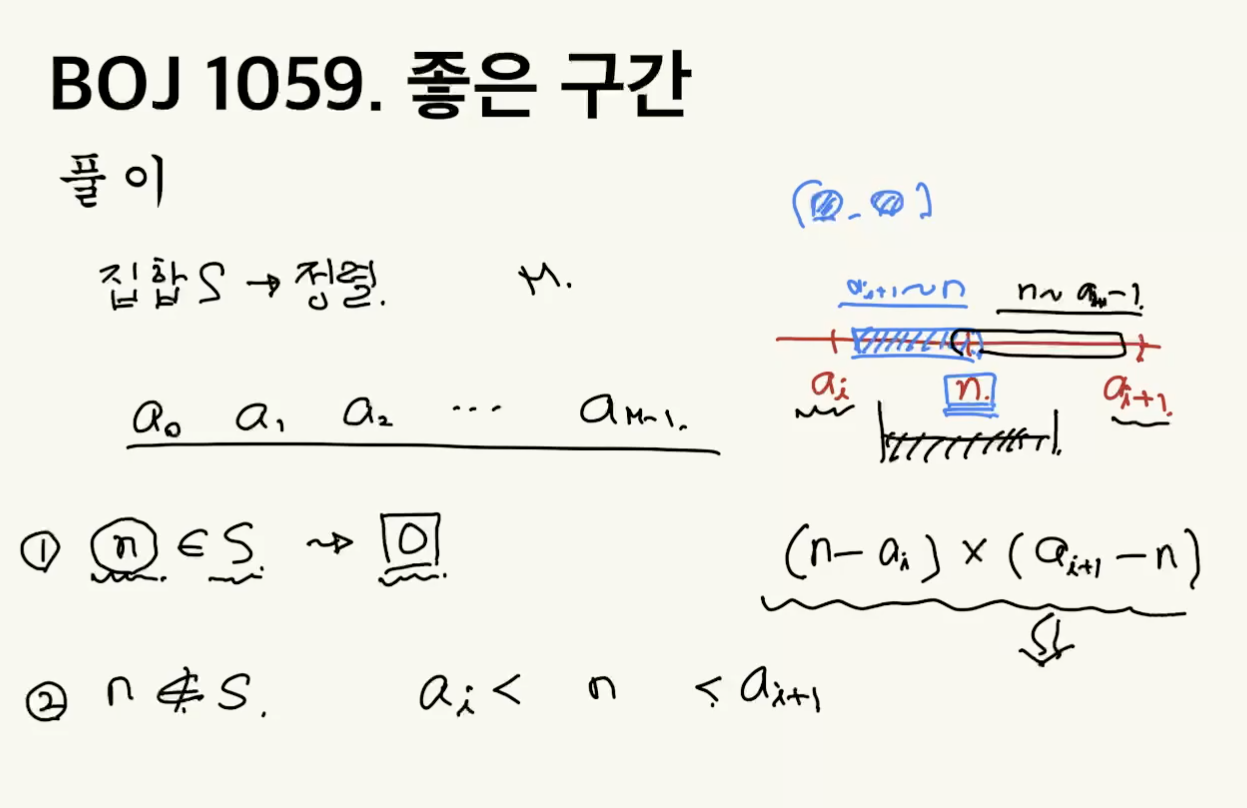

In [5]:
L = int(input())
S = list(map(int, input().split()))
n = int(input())

if n in S:
  print(0)
else:
  S.sort()
  left = 0
  for i in range(L):
    if left < n and n < S[i]:
      print((n - left) * (S[i] - n) - 1)
      break
    left = S[i]

4
1 7 14 10
2
4


In [ ]:
### 4. https://www.acmicpc.net/problem/5724 ✅

### 풀이
### - 정사각형 -> 왼쪽 끝 위치, 한변의 길이


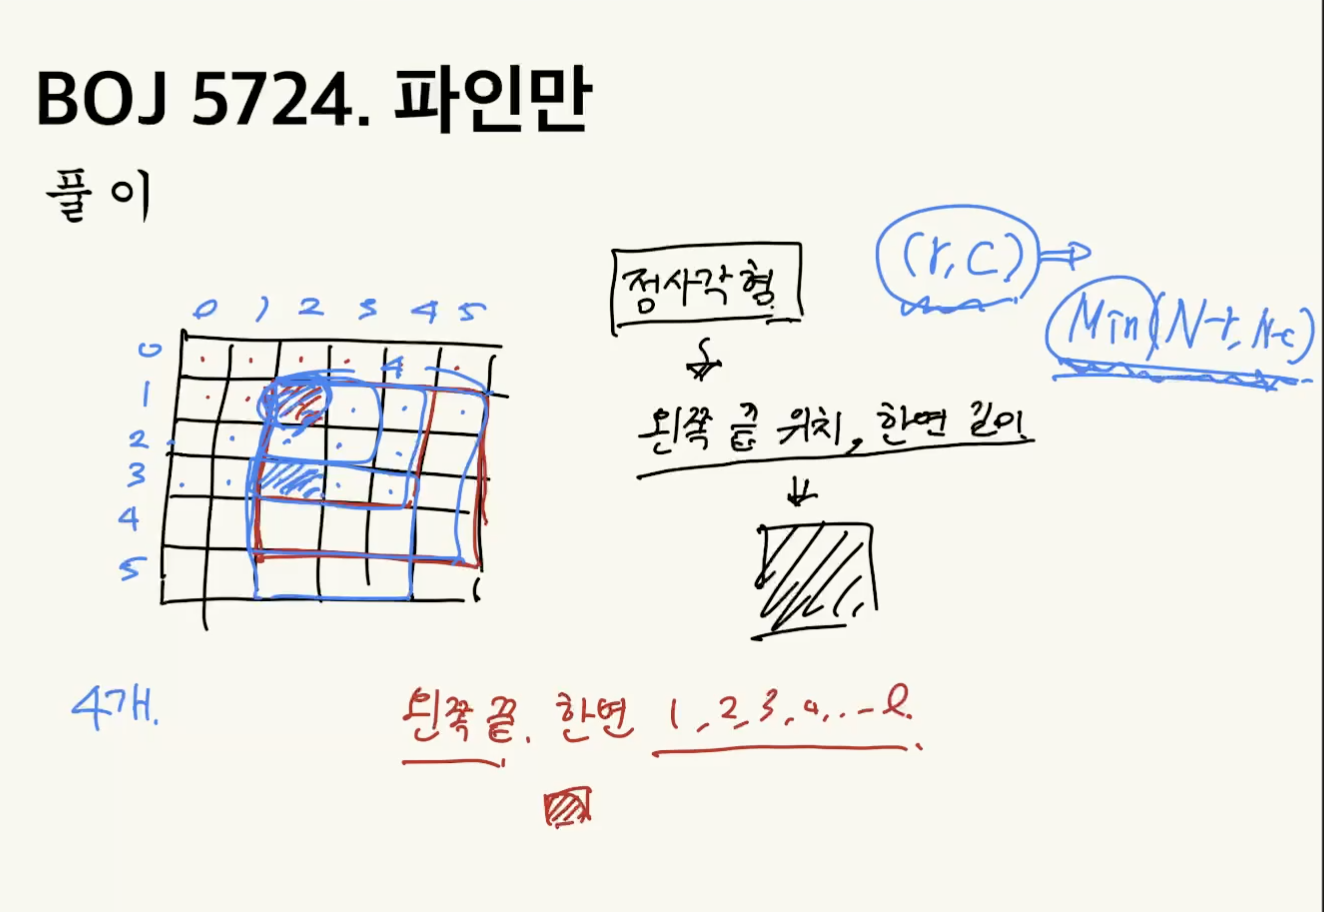

In [6]:
while True:
  N = int(input())
  if N == 0:
    break

  ans = 0
  for i in range(N):
    for j in range(N):
      ans += min(N-i, N-j)

  print(ans)

2
5
1
1
8
204
0


In [8]:
### 5. https://www.acmicpc.net/problem/2320 🔺

### 풀이
### - DP 활용
### - 밑에 그림 참고

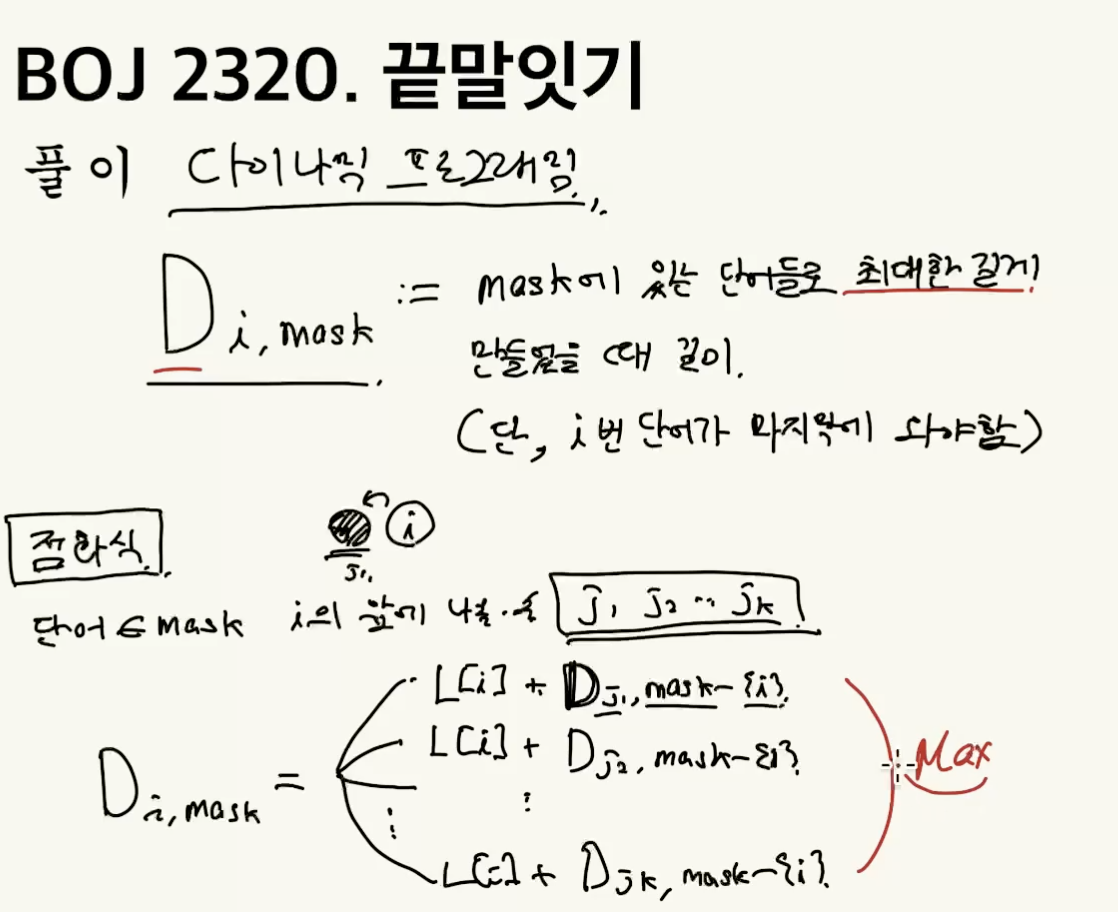

In [10]:
N = int(input())
S = [input() for _ in range(N)]

cache = [[-1] * (2 ** N) for _ in range(N)]

def dp(last, mask):
  if cache[last][mask] != -1:
    return cache[last][mask]

  ret = len(S[last])
  for i in range(N):
    if i == last:
      continue


    if mask & (2**i) != 0 and S[i][-1] == S[last][0]:
      ret = max(ret, len(S[last]) + dp(i, mask - (2 ** last)))

  cache[last][mask] = ret
  return ret

answer = 0
for i in range(N):
  answer = max(answer, dp(i, 2 ** N - 1))

print(answer)

3
AEIOU
UIU
EO
8


In [11]:
### 6. https://www.acmicpc.net/problem/2923 ❌

### 풀이
### - 밑에 그림 참고

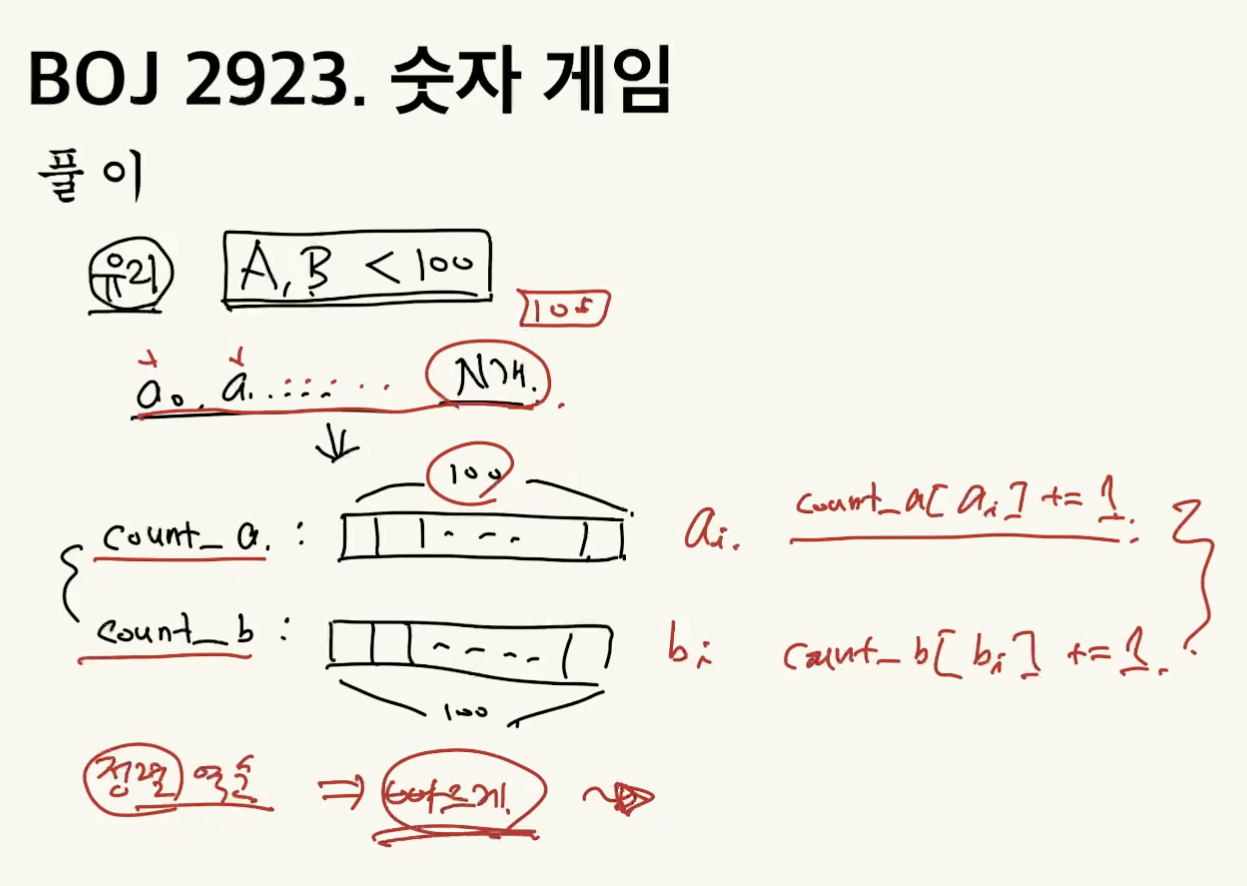

In [12]:
import sys
input = sys.stdin.readline

N = int(input())

count_a = [0] * 100
count_b = [0] * 100

def calc_min_max_sum(count_a, count_b):
  max_sum = 0
  pos_a = 0
  pos_b = 99

  while pos_a < 100 and pos_b >= 0:
    if count_a[pos_a] > 0 and count_b[pos_b] > 0:
      max_sum = max(max_sum, pos_a + pos_b)

    if count_a[pos_a] <= count_b[pos_b]:
      count_b[pos_b] -= count_a[pos_a]
      pos_a += 1

    else:
      count_a[pos_a] -= count_b[pos_b]
      pos_b -= 1

  return max_sum

for _ in range(N):
  a, b = map(int, input().split())

  count_a[a] += 1
  count_b[b] += 1

  print(calc_min_max_sum(count_a[:], count_b[:]))


ValueError: invalid literal for int() with base 10: ''